In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'e0ec7bbd-5efd-403a-bad4-e464896eead4',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-03-13T14:11:55.738Z', 'error_code': 0, 'error_message': None, 'elapsed': 22, 'credit_count': 1, 'notice': None, 'total_count': 9040}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10916, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [2]:
type(data)

dict

In [3]:
import pandas as pd 
pd.set_option('display.max_columns', None) #displays all the columns 


In [7]:
#This normalizes the data and makes it all pretty in a dataframe
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now') 
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10916,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.965316e+07,1.965316e+07,False,NaN,1,NaN,NaN,None,2024-03-13T14:10:00.000Z,72698.469306,6.328694e+10,22.4718,-0.364143,0.913985,8.769851,51.264267,70.347416,71.225832,1.428754e+12,52.2609,1.526668e+12,None,2024-03-13T14:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-13 15:25:41.118172
1,1027,Ethereum,ETH,ethereum,8556,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.200896e+08,1.200896e+08,True,NaN,2,NaN,NaN,None,2024-03-13T14:10:00.000Z,3986.579114,2.628160e+10,14.5643,-0.790388,-0.476687,3.309415,59.937814,57.191524,75.609520,4.787468e+11,17.5116,4.787468e+11,None,2024-03-13T14:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-13 15:25:41.118172
2,825,Tether USDt,USDT,tether,78285,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,1.026629e+11,1.067971e+11,True,NaN,3,NaN,NaN,None,2024-03-13T14:09:00.000Z,1.000780,1.152977e+11,13.7716,0.002252,0.066822,0.035906,0.079057,0.097786,0.055805,1.027430e+11,3.7581,1.068805e+11,None,2024-03-13T14:09:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-03-13 15:25:41.118172
3,1839,BNB,BNB,bnb,2099,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.495395e+08,1.495395e+08,False,NaN,4,NaN,NaN,None,2024-03-13T14:09:00.000Z,586.944836,5.500631e+09,60.4673,-1.351134,11.002198,38.230339,84.408837,96.608336,133.503352,8.777143e+10,3.2105,8.777143e+10,None,2024-03-13T14:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-13 15:25:41.118172
4,5426,Solana,SOL,solana,637,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.435338e+08,5.716878e+08,True,NaN,5,NaN,NaN,None,2024-03-13T14:10:00.000Z,151.716425,5.514296e+09,4.1354,-0.784027,0.789323,17.556138,44.749459,65.401299,111.840763,6.729137e+10,2.4614,8.673443e+10,None,2024-03-13T14:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-13 15:25:41.118172
5,52,XRP,XRP,xrp,1254,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.473683e+10,9.998782e+10,False,NaN,6,NaN,NaN,None,2024-03-13T14:10:00.000Z,0.678944,3.065116e+09,-60.4385,-1.429078,-3.221732,12.129871,30.892855,18.572692,9.260343,3.716323e+10,1.3594,6.789438e+10,None,2024-03-13T14:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-13 15:25:41.118172
6,3408,USDC,USDC,usd-coin,17343,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.043106e+10,3.043106e+10,False,NaN,7,NaN,NaN,None,2024-03-13T14:10:00.000Z,0.999896,1.227164e+10,16.5946,-0.016262,0.012304,0.001543,-0.036472,-0.013965,-0.046677,3.042791e+10,1.1130,3.042791e+10,None,2024-03-13T14:10:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-03-13 15:25:41.118172
7,2010,Cardano,ADA,cardano,1102,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.555288e+10,3.670029e+10,False,NaN,8,NaN,NaN,None,2024-03-13T14:09:00.000Z,0.750279,9.686147e+08,-21.0297,-1.391375,-0.423484,4.204047,40.217033,37.556657,18.615293,2.667457e+10,0.9757,3.376254e+10,None,2024-03-13T14:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-13 15:25:41.118172
8,74,Dogecoin,DOGE,dogecoin,919,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,

In [26]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
    
    # Use this if you just want to keep it in a dataframe
    df = pd.json_normalize(data['data'])
    df['Timestamp'] = pd.to_datetime('now')
    df
    
    if not os.path.isfile(r'D:\Projects\API.csv'):
        df.to_csv(r'D:\Projects\API.csv', header='column_names')
    else:
        df.to_csv(r'D:\Projects\API.csv', mode = 'a',header=False)

  


In [27]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed


PermissionError: [Errno 13] Permission denied: 'D:\\Projects\\API.csv'

In [28]:
df72 = pd.read_csv(r'D:\Projects\API.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,0,1,Bitcoin,BTC,bitcoin,10916,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.965322e+07,1.965322e+07,False,NaN,1,NaN,NaN,NaN,2024-03-13T15:20:00.000Z,72950.527305,6.135097e+10,14.4993,0.497445,1.486784,10.482593,49.508271,69.473186,71.697353,1.433713e+12,52.4824,1.531961e+12,NaN,2024-03-13T15:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-13 16:21:39.220033
1,1,1027,Ethereum,ETH,ethereum,8556,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.200896e+08,1.200896e+08,True,NaN,2,NaN,NaN,NaN,2024-03-13T15:20:00.000Z,3990.031259,2.582247e+10,8.3182,0.045549,-0.079870,5.755718,57.857260,56.210723,75.259491,4.791614e+11,17.5402,4.791614e+11,NaN,2024-03-13T15:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-13 16:21:39.220033
2,2,825,Tether USDt,USDT,tether,78286,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,1.026629e+11,1.067971e+11,True,NaN,3,NaN,NaN,NaN,2024-03-13T15:19:00.000Z,1.000772,1.122757e+11,6.9559,0.010991,0.075244,0.041720,0.050148,0.088994,0.044891,1.027421e+11,3.7610,1.068796e+11,NaN,2024-03-13T15:19:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-03-13 16:21:39.220033
3,3,1839,BNB,BNB,bnb,2099,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.495395e+08,1.495395e+08,False,NaN,4,NaN,NaN,NaN,2024-03-13T15:19:00.000Z,590.255851,5.247203e+09,33.9124,0.538087,8.460974,40.790462,84.310598,97.022327,135.576735,8.826654e+10,3.2311,8.826654e+10,NaN,2024-03-13T15:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-13 16:21:39.220033
4,4,5426,Solana,SOL,solana,637,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.435334e+08,5.716874e+08,True,NaN,5,NaN,NaN,NaN,2024-03-13T15:20:00.000Z,156.620933,5.633622e+09,3.1571,2.598306,4.696926,23.226042,46.521995,69.382475,118.217746,6.946662e+10,2.5429,8.953822e+10,NaN,2024-03-13T15:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-13 16:21:39.220033
5,5,52,XRP,XRP,xrp,1254,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.473683e+10,9.998782e+10,False,NaN,6,NaN,NaN,NaN,2024-03-13T15:20:00.000Z,0.679926,2.974021e+09,-61.9367,0.012449,-2.974242,14.272778,29.716110,18.640663,9.403814,3.721697e+10,1.3624,6.799257e+10,NaN,2024-03-13T15:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-13 16:21:39.220033
6,6,3408,USDC,USDC,usd-coin,17344,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.045179e+10,3.045179e+10,False,NaN,7,NaN,NaN,NaN,2024-03-13T15:19:00.000Z,0.999958,1.168828e+10,5.1906,0.001217,0.004679,-0.017024,-0.029967,-0.036480,-0.027114,3.045052e+10,1.1147,3.045052e+10,NaN,2024-03-13T15:19:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-03-13 16:21:39.220033
7,7,2010,Cardano,ADA,cardano,1102,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.555321e+10,3.670029e+10,False,NaN,8,NaN,NaN,NaN,2024-03-13T15:19:00.000Z,0.746547,9.585607e+08,-23.1368,-0.594907,0.337722,4.732638,36.720325,36.028536,17.802926,2.654214e+10,0.9716,3.359460e+10,NaN,2024-03-13T15:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-13 16:21:39.220033
8,8,74,Dogecoin,DOGE,dogecoin,919,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",

In [23]:
df


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,10916,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.965322e+07,1.965322e+07,False,NaN,1,NaN,NaN,None,2024-03-13T15:03:00.000Z,72401.210988,6.190002e+10,16.9850,-0.018637,1.222158,9.625227,48.550275,68.751670,69.594167,1.422917e+12,52.2468,1.520425e+12,None,2024-03-13T15:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-13 16:04:04.364600
1,1027,Ethereum,ETH,ethereum,8556,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.200896e+08,1.200896e+08,True,NaN,2,NaN,NaN,None,2024-03-13T15:03:00.000Z,3964.438222,2.588564e+10,9.5099,-0.509101,-0.376938,4.738986,57.088184,55.930590,73.253334,4.760879e+11,17.4810,4.760879e+11,None,2024-03-13T15:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-13 16:04:04.364600
2,825,Tether USDt,USDT,tether,78286,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,1.026629e+11,1.067971e+11,True,NaN,3,NaN,NaN,None,2024-03-13T15:02:00.000Z,1.000799,1.136844e+11,9.6683,0.017091,0.094390,0.018647,0.051267,0.096962,0.056327,1.027449e+11,3.7726,1.068825e+11,None,2024-03-13T15:02:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-03-13 16:04:04.364600
3,1839,BNB,BNB,bnb,2099,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.495395e+08,1.495395e+08,False,NaN,4,NaN,NaN,None,2024-03-13T15:02:00.000Z,584.363638,5.299012e+09,38.6303,0.020374,7.687104,39.668428,82.759221,95.328951,133.143581,8.738542e+10,3.2086,8.738542e+10,None,2024-03-13T15:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-13 16:04:04.364600
4,5426,Solana,SOL,solana,637,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.435334e+08,5.716874e+08,True,NaN,5,NaN,NaN,None,2024-03-13T15:03:00.000Z,155.405997,5.548031e+09,2.7505,2.582380,4.472777,22.041213,45.849508,69.122709,116.385162,6.892776e+10,2.5309,8.884366e+10,None,2024-03-13T15:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-13 16:04:04.364600
5,52,XRP,XRP,xrp,1254,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.473683e+10,9.998782e+10,False,NaN,6,NaN,NaN,None,2024-03-13T15:03:00.000Z,0.673930,3.003336e+09,-61.2408,-0.479530,-2.793941,12.659308,28.880130,17.635901,8.285680,3.688878e+10,1.3545,6.739299e+10,None,2024-03-13T15:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-13 16:04:04.364600
6,3408,USDC,USDC,usd-coin,17344,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.045179e+10,3.045179e+10,False,NaN,7,NaN,NaN,None,2024-03-13T15:03:00.000Z,0.999942,1.185355e+10,8.0555,0.000165,-0.001901,-0.002565,-0.026358,-0.002950,-0.051004,3.045002e+10,1.1181,3.045002e+10,None,2024-03-13T15:03:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-03-13 16:04:04.364600
7,2010,Cardano,ADA,cardano,1102,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.555321e+10,3.670029e+10,False,NaN,8,NaN,NaN,None,2024-03-13T15:02:00.000Z,0.741753,9.600372e+08,-22.0560,-0.811593,0.309331,4.028541,36.373449,35.708316,16.843519,2.637170e+10,0.9683,3.337888e+10,None,2024-03-13T15:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-13 16:04:04.364600
8,74,Dogecoin,DOGE,dogecoin,919,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.4345

In [29]:
pd.set_option('display.float_format', lambda x: '%.5f'%x) #changing the numbers from scientific notation to more readable

In [30]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,10916,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19653218.00000,19653218.00000,False,NaN,1,NaN,NaN,None,2024-03-13T15:22:00.000Z,72905.35316,61379820987.00855,14.73230,0.42156,1.41213,10.74814,49.08467,69.30039,71.72360,1432824798927.11938,52.18190,1531012416260.25000,None,2024-03-13T15:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-13 16:22:40.048944
1,1027,Ethereum,ETH,ethereum,8556,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120089623.31680,120089623.31680,True,NaN,2,NaN,NaN,None,2024-03-13T15:22:00.000Z,3983.54303,25831076450.12132,8.32510,-0.06960,-0.21909,5.92829,57.48576,55.90843,75.04232,478382181491.94635,17.42210,478382181491.95001,None,2024-03-13T15:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-13 16:22:40.048944
2,825,Tether USDt,USDT,tether,78286,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,102662860009.66920,106797122778.23004,True,NaN,3,NaN,NaN,None,2024-03-13T15:21:00.000Z,1.00056,112501178324.30116,7.17200,-0.01452,0.04448,0.01768,0.01136,0.06355,0.03475,102720619065.12871,3.76020,106857207807.39000,None,2024-03-13T15:21:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-03-13 16:22:40.048944
3,1839,BNB,BNB,bnb,2099,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,149539460.41817,149539460.41817,False,NaN,4,NaN,NaN,None,2024-03-13T15:21:00.000Z,589.64979,5255343572.22461,33.98040,0.39864,8.44658,40.89027,84.19830,96.78555,135.31765,88175911332.06265,3.22780,88175911332.06000,None,2024-03-13T15:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-13 16:22:40.048944
4,5426,Solana,SOL,solana,637,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,443533434.36578,571687435.11942,True,NaN,5,NaN,NaN,None,2024-03-13T15:22:00.000Z,157.06833,5642930002.24586,3.14980,3.04483,4.93175,24.09461,47.10332,69.77892,119.07465,69665056760.59909,2.53710,89793991909.23000,None,2024-03-13T15:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-13 16:22:40.048944
5,52,XRP,XRP,xrp,1254,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,54736825690.00000,99987824103.00000,False,NaN,6,NaN,NaN,None,2024-03-13T15:22:00.000Z,0.67913,2974624794.30081,-61.93380,-0.04545,-3.12991,14.61709,29.64206,18.43233,9.31408,37173335839.87777,1.35380,67912845458.75000,None,2024-03-13T15:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-13 16:22:40.048944
6,3408,USDC,USDC,usd-coin,17344,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,30451790197.47536,30451790197.47536,False,NaN,7,NaN,NaN,None,2024-03-13T15:22:00.000Z,0.99998,11720787167.99276,5.49830,-0.00172,0.00216,-0.00923,-0.04455,-0.03993,-0.01523,30451150827.53379,1.10900,30451150827.53000,None,2024-03-13T15:22:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-03-13 16:22:40.048944
7,2010,Cardano,ADA,cardano,1102,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35553211637.46300,36700287535.80100,False,NaN,8,NaN,NaN,None,2024-03-13T15:21:00.000Z,0.74667,960475539.25385,-22.98460,-0.52188,0.34928,4.85415,36.77803,36.00875,17.87492,26546411320.41380,0.97180,33600016831.11000,None,2024-03-13T15:21:00.0

In [31]:
#findind average of all crypto percent change
df3=df.groupby('name',sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.42156,1.41213,10.74814,49.08467,69.30039,71.72360
Ethereum,-0.06960,-0.21909,5.92829,57.48576,55.90843,75.04232
Tether USDt,-0.01452,0.04448,0.01768,0.01136,0.06355,0.03475
BNB,0.39864,8.44658,40.89027,84.19830,96.78555,135.31765
Solana,3.04483,4.93175,24.09461,47.10332,69.77892,119.07465
XRP,-0.04545,-3.12991,14.61709,29.64206,18.43233,9.31408
USDC,-0.00172,0.00216,-0.00923,-0.04455,-0.03993,-0.01523
Cardano,-0.52188,0.34928,4.85415,36.77803,36.00875,17.87492
Dogecoin,-0.13194,-0.89554,6.12604,107.96738,107.35873,75.14936


In [36]:
df4=df3.stack()
df4

name                                   
Bitcoin    quote.USD.percent_change_1h     0.42156
           quote.USD.percent_change_24h    1.41213
           quote.USD.percent_change_7d    10.74814
           quote.USD.percent_change_30d   49.08467
           quote.USD.percent_change_60d   69.30039
                                            ...   
Chainlink  quote.USD.percent_change_24h    0.11865
           quote.USD.percent_change_7d     6.27993
           quote.USD.percent_change_30d    1.50565
           quote.USD.percent_change_60d   43.85443
           quote.USD.percent_change_90d   36.53661
Length: 90, dtype: float64

In [37]:
type(df4)

pandas.core.series.Series

In [40]:
df5 = df4.to_frame(name='values')
df5

values
name                                           
Bitcoin   quote.USD.percent_change_1h   0.42156
          quote.USD.percent_change_24h  1.41213
          quote.USD.percent_change_7d  10.74814
          quote.USD.percent_change_30d 49.08467
          quote.USD.percent_change_60d 69.30039
...                                         ...
Chainlink quote.USD.percent_change_24h  0.11865
          quote.USD.percent_change_7d   6.27993
          quote.USD.percent_change_30d  1.50565
          quote.USD.percent_change_60d 43.85443
          quote.USD.percent_change_90d 36.53661

[90 rows x 1 columns]

In [41]:
index = pd.Index(range(90))

df6= df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.42156
1,Bitcoin,quote.USD.percent_change_24h,1.41213
2,Bitcoin,quote.USD.percent_change_7d,10.74814
3,Bitcoin,quote.USD.percent_change_30d,49.08467
4,Bitcoin,quote.USD.percent_change_60d,69.30039
...,...,...,...
85,Chainlink,quote.USD.percent_change_24h,0.11865
86,Chainlink,quote.USD.percent_change_7d,6.27993
87,Chainlink,quote.USD.percent_change_30d,1.50565
88,Chainlink,quote.USD.percent_change_60d,43.85443


In [47]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.42156
1,Bitcoin,quote.USD.percent_change_24h,1.41213
2,Bitcoin,quote.USD.percent_change_7d,10.74814
3,Bitcoin,quote.USD.percent_change_30d,49.08467
4,Bitcoin,quote.USD.percent_change_60d,69.30039
...,...,...,...
85,Chainlink,quote.USD.percent_change_24h,0.11865
86,Chainlink,quote.USD.percent_change_7d,6.27993
87,Chainlink,quote.USD.percent_change_30d,1.50565
88,Chainlink,quote.USD.percent_change_60d,43.85443


In [52]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1hr','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1hr,0.42156
1,Bitcoin,24h,1.41213
2,Bitcoin,7d,10.74814
3,Bitcoin,30d,49.08467
4,Bitcoin,60d,69.30039
...,...,...,...
85,Chainlink,24h,0.11865
86,Chainlink,7d,6.27993
87,Chainlink,30d,1.50565
88,Chainlink,60d,43.85443


In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

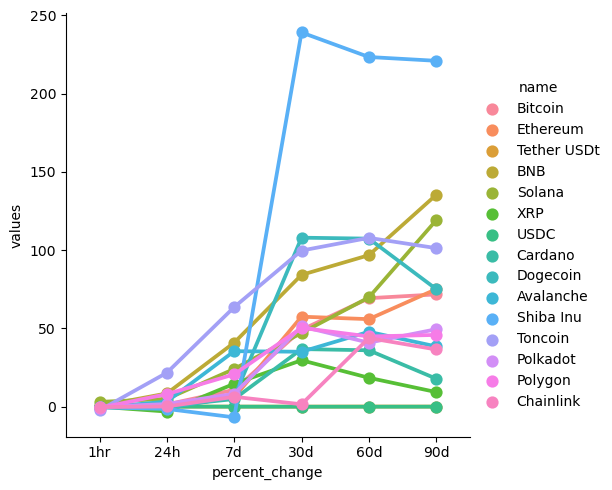

In [51]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [60]:
df10 = df[['name','quote.USD.price','Timestamp']]
df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,Timestamp
0,Bitcoin,72905.35316,2024-03-13 16:22:40.048944
1,Ethereum,3983.54303,2024-03-13 16:22:40.048944
2,Tether USDt,1.00056,2024-03-13 16:22:40.048944
3,BNB,589.64979,2024-03-13 16:22:40.048944
4,Solana,157.06833,2024-03-13 16:22:40.048944
5,XRP,0.67913,2024-03-13 16:22:40.048944
6,USDC,0.99998,2024-03-13 16:22:40.048944
7,Cardano,0.74667,2024-03-13 16:22:40.048944
8,Dogecoin,0.16777,2024-03-13 16:22:40.048944
9,Avalanche,53.30002,2024-03-13 16:22:40.048944
